# Car Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('D:/project/car price/train.csv')

In [3]:
train.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
test = pd.read_csv('D:/project/car price/test.csv')

In [5]:
test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
test.shape

(4340, 8)

In [7]:
train.shape

(301, 9)

In [8]:
print(train['Seller_Type'].unique())
print(train['Owner'].unique())
print(train['Transmission'].unique())
print(train['Fuel_Type'].unique())

['Dealer' 'Individual']
[0 1 3]
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']


In [9]:
train.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
train.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
train.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
data = train[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [13]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
data['current_year'] = 2020

In [15]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [16]:
data['no_of_years'] = data['current_year'] - data['Year']

In [17]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [18]:
data.drop(['Year', 'current_year'], axis = 1, inplace = True)

In [19]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


<AxesSubplot:xlabel='Selling_Price'>

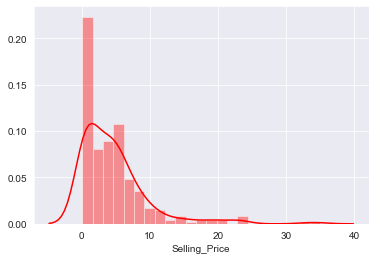

In [20]:
sns.set_style('darkgrid')
sns.distplot(data['Selling_Price'], color = 'Red')

<AxesSubplot:ylabel='Kms_Driven'>

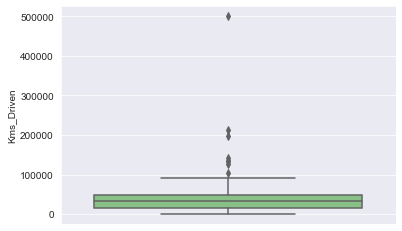

In [21]:
sns.boxplot(data['Kms_Driven'], orient= 'vertical', palette = 'Accent')

<AxesSubplot:xlabel='Present_Price'>

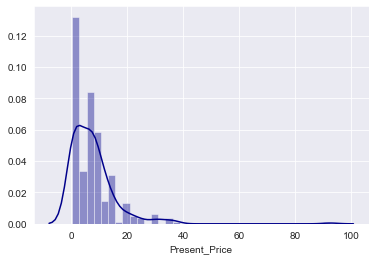

In [22]:
sns.distplot(data['Present_Price'], color = 'darkblue')

<AxesSubplot:title={'center':'no_of_years'}>

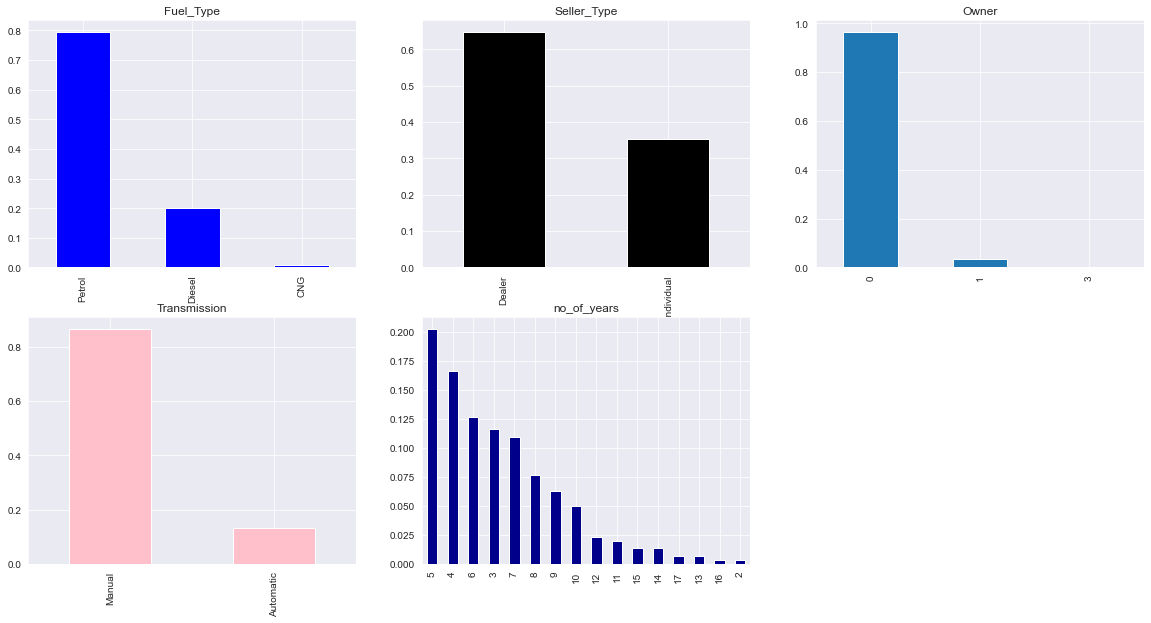

In [23]:
plt.subplot(2,3,1)
data['Fuel_Type'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Fuel_Type', color = 'Blue')
plt.subplot(2,3,2)
data['Seller_Type'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Seller_Type', color = 'black')
plt.subplot(2,3,3)
data['Owner'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Owner')
plt.subplot(2,3,4)
data['Transmission'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Transmission', color = 'pink')
plt.subplot(2,3,5)
data['no_of_years'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'no_of_years', color = 'darkblue')

In [24]:
data = pd.get_dummies(data, drop_first=True)

In [25]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [26]:
data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


<AxesSubplot:>

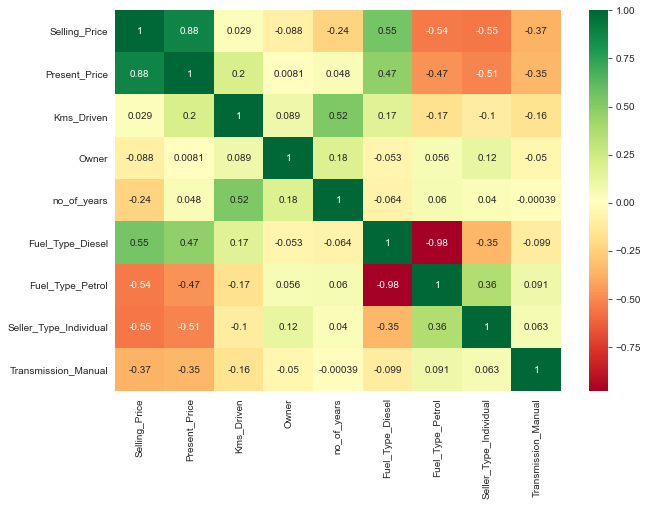

In [27]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,7))
sns.heatmap(data[top_corr_features].corr(), annot = True, cmap = 'RdYlGn')

In [28]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [29]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [30]:
x.shape, y.shape

((301, 8), (301,))

In [31]:
x.head()

,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [32]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [34]:
#Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [35]:
print(model.feature_importances_)

[0.36721002 0.0407241  0.00043468 0.07701795 0.2238684  0.00870578
 0.1315539  0.15048518]


<AxesSubplot:>

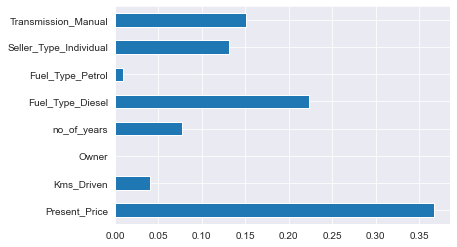

In [36]:
## plot graph of feature importance for better understanding
feature_imp = pd.Series(model.feature_importances_, index = x.columns)
feature_imp.plot(kind = 'barh')

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [38]:
x_train.shape, x_test.shape

((240, 8), (61, 8))

In [39]:
y_train.shape, y_test.shape

((240,), (61,))

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [41]:
## Hyperparameters
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [42]:
## Randomized Search CV

## No. of trees in random forest 
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

## No. of features to consider at every split
max_features = ['auto', 'sqrt']

## Maximum no. of levels in the tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]

## Minimum of no of samples required to split a node
min_samples_split = [2,5,10,15,100]

## Minimum no of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [45]:
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, scoring = 'neg_mean_squared_error',
                             n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [46]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   38.6s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [47]:
prediction  = rf_random.predict(x_test)

In [48]:
from sklearn.metrics import r2_score
print('R square value of model', r2_score(prediction, y_test))

R square value of model 0.89369100606898


In [49]:
prediction

array([ 2.90439904, 23.31712603,  6.19161628,  9.95070716,  0.43576638,
        1.19064223,  0.35937342,  0.51564307,  8.05778808,  4.5157224 ,
        4.97993396,  1.17410059,  7.29580628,  5.44685977,  5.80672965,
        0.42092397,  6.21710534, 23.29948317,  2.89598194,  1.17302178,
        6.76411891, 23.49580496,  5.78059107,  4.09033459,  0.43593744,
        6.85559792,  0.51811496,  4.65914416,  3.64195687,  7.36528096,
        5.21053936,  3.56785866,  0.27729083,  5.23547975, 10.05790951,
        4.80901567,  4.48970869, 23.29948317,  5.89154037,  4.12277645,
        2.83126979,  0.27142841,  0.43362549,  0.70193157,  5.20699702,
        6.52744673,  0.50658878,  4.88090996, 10.4757378 ,  4.06780788,
        5.58592984,  4.19997179,  5.15916479, 10.2626454 ,  0.22794221,
        1.18861801,  1.18861801,  3.38445093,  6.19398485,  1.18380656,
       23.49580496])

<AxesSubplot:xlabel='Selling_Price'>

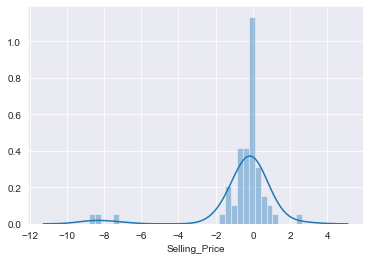

In [50]:
sns.distplot(y_test - prediction)

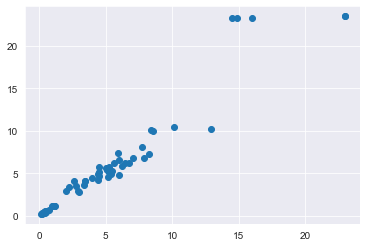

In [51]:
plt.scatter(y_test, prediction)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr_model = LinearRegression()
model1 = lr_model.fit(x_train, y_train)

In [53]:
y_pred = model1.predict(x_test)
print('Accuracy of model', mean_squared_error(y_pred, y_test))
print('R square value of model', r2_score(y_pred, y_test))

Accuracy of model 2.367964251980599
R square value of model 0.8865957463391931


So here we get 89% R square value for Random Forest.

In [54]:
import pickle
file = open('random_forest_regressor.pkl', 'wb')

pickle.dump(rf_random, file)